# Chapter 13
# Compare Machine Learning Algorithms

It is important to compare the performance of multiple different machine learning algorithms consistently. In this chapter you will discover how you can create a test harness to compare multiple different machine learning algorithms in Python with scikit-learn. You can use this test harness as a template on your own machine learning problems and add more and different algorithms to compare. After completing this lesson you will know:
1. How to **formulate an experiment** to directly compare machine learning algorithms.
2. A **reusable template** for evaluating the performance of multiple algorithms on one dataset.
3. How to **report and visualize** the results when comparing algorithm performance.

Let's get started.

## 13.1 Choose The Best Machine Learning Model

When you work on a machine learning project, you often end up with multiple good models to choose from. Each model will have different performance characteristics. <a>Using `resampling methods` like cross validation, you can get an estimate for how accurate each model may be on unseen data. You need to be able to use these estimates to choose one or two best models from the suite of models that you have created</a>.

When you have a <a>new dataset, it is a good idea to visualize the data using different techniques in order to look at the data from different perspectives</a>. The same idea applies to **model selection**. <a>You should use a number of different ways of looking at the estimated accuracy of your machine learning algorithms in order to choose the one or two algorithm to finalize</a>. A way to do this is to use <a>visualization methods to show the average accuracy, variance and other properties of the distribution of model accuracies</a>. In the next section you will discover exactly how you can do that in Python with scikit-learn.

## 13.2 Compare Machine Learning Algorithms Consistently

The key to a fair <a>comparison of machine learning algorithms is ensuring that each algorithm is evaluated in the same way on the same data. You can achieve this by forcing each algorithm to be evaluated on a consistent test harness</a>. In the example below six different classification algorithms are compared on a single dataset:
- Logistic Regression.
- Linear Discriminant Analysis.
- k-Nearest Neighbors.
- Classification and Regression Trees.
- Naive Bayes.
- Support Vector Machines.

Our dataset has two classes and eight numeric input variables of varying scales. The 10-fold cross validation procedure is used to evaluate each algorithm, importantly configured with the same random seed to ensure that the same splits to the training data are performed and that each algorithm is evaluated in precisely the same way. Each algorithm is given a short name, useful for summarizing results afterward.

LR -> accuracy: (0.769515), Standard Deviation: (0.048411)
LDA -> accuracy: (0.773462), Standard Deviation: (0.051592)
KNN -> accuracy: (0.726555), Standard Deviation: (0.061821)
CART -> accuracy: (0.692567), Standard Deviation: (0.065785)
NB -> accuracy: (0.755178), Standard Deviation: (0.042766)
SVM -> accuracy: (0.760424), Standard Deviation: (0.052931)


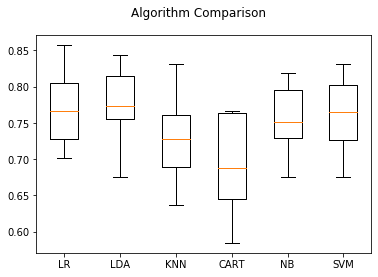

In [9]:
# imports
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
%matplotlib inline

# Compare Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# load data
filename = '.\data\pima-indians-diabetes.data.csv'

names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

# prepare models
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='scale')))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s -> accuracy: (%f), Standard Deviation: (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

Running the example provides a list of each algorithm **short name**, the **mean accuracy** and the **standard deviation accuracy**.

The example also provides a box and whisker plot showing the spread of the accuracy scores across each cross validation fold for each algorithm.

From these results, it would suggest that both `logistic regression` and `linear discriminant analysis` are perhaps worthy of further study on this problem.